# 機械学習レポート課題2

## 1. 勾配の計算

3次元の入力$\pmb{x} \in \mathbb{R}^{1 \times 3}$を受け取り，2次元の中間層$\pmb{h} \in \mathbb{R}^{1 \times 2}$を介して，$\hat{y} \in \mathbb{R}$を出力することで二値分類を行う2層のニューラルネットワークを次式で定義する．

$$
\hat{y} = \sigma(\pmb{h}Q+b), \; \pmb{h}=\mathrm{ReLU}(\pmb{x}W)
$$

ただし，$\sigma(.)$はシグモイド関数であり，$\mathrm{ReLU}(a) = \max(a, 0)$である．また，$W \in \mathbb{R}^{3 \times 2}, Q \in \mathbb{R}^{2 \times 1}, b \in \mathbb{R}$はパラメータであり，以下に示す値に設定されているとする．

$$
W = \begin{pmatrix}1 & -1 \\ 1 & -1 \\ -0.5 & 1.5\end{pmatrix}, \; Q = \begin{pmatrix}1 \\ 1\end{pmatrix}, \; b = -1.5
$$

以下の問に答えよ．ただし，答えをプログラムで求めた場合は，その実装と答えを示せ．答えを手計算等で求めた場合は，その求め方をMarkdown形式で記述するか，紙に書いた解答を撮影やスキャンするなどして，Jupyter Notebookの中に貼り付けよ．

### (1)

このモデルに入力$x=\begin{pmatrix}1 & -1 & 1\end{pmatrix}$が与えられたとき，中間層の値$\pmb{h}$と出力値$\hat{y}$を求めよ．

In [1]:
import torch
import torch.nn as nn

In [2]:
ReLU=nn.ReLU()
Sigmoid=nn.Sigmoid()

In [3]:
dtype = torch.float

x = torch.tensor([[1,-1,1]], dtype=dtype)
w=torch.tensor([[1,-1], [1, -1], [-0.5, 1.5]], dtype=dtype)
Q= torch.tensor([[1],[1]], dtype=dtype)
b=torch.tensor([[-1.5]], dtype=dtype)

h = ReLU(x.mm(w))
y_hat = Sigmoid(h.mm(Q).add(b))
print(f'h:{h}')
print(f'y_hat:{y_hat}')

h:tensor([[0.0000, 1.5000]])
y_hat:tensor([[0.5000]])



学習事例$(\pmb{x}, y) = \left(\begin{pmatrix}1 & -1 & 1\end{pmatrix}, 0\right)$が与えられたとき，このニューラルネットワークをクロスエントロピー誤差関数で訓練したい．以下の問に答えよ．

### (2)

損失関数の計算式を示せ．

\begin{align}
    H(p,q) &= -\sum_k p(k) log q(k)\\
    &=-y\log\hat{y}-(1-y)log(1-\hat{y})
\end{align}

### (3)

損失関数の値を計算せよ．ただし，$\log$は自然対数（底は$e$）とせよ．

In [4]:
x = torch.tensor([[1,-1,1]], dtype=dtype)
w=torch.tensor([[1,-1], [1, -1], [-0.5, 1.5]], dtype=dtype, requires_grad=True)
Q= torch.tensor([[1],[1]], dtype=dtype, requires_grad=True)
b=torch.tensor([[-1.5]], dtype=dtype, requires_grad=True)

h = ReLU(x.mm(w))
y_pred =h.mm(Q).add(b)
y= torch.tensor([[0]], dtype=dtype)

In [6]:
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')
loss=loss_fn(y_pred, y)
print(f'loss:{loss}')

loss:0.6931471824645996


### (4)

損失関数の$W$,$Q$,$b$に関する勾配の値を計算せよ．

In [ ]:
loss.backward()

In [28]:
print(loss.item())
print(f'w:{w.grad}')
print(f'Q:{Q.grad}')
print(f'b:{b.grad}')

0.6931471824645996
w:tensor([[ 0.0000,  0.5000],
        [-0.0000, -0.5000],
        [ 0.0000,  0.5000]])
Q:tensor([[0.0000],
        [0.7500]])
b:tensor([[0.5000]])


## 2. 深いニューラルネットワークの学習

深い（層が多い）ニューラルネットワークの学習は，浅い（層が少ない）ニューラルネットワークよりも難しいとされる．なぜ深いニューラルネットワークの学習は難しいのか説明せよ．また，深いニューラルネットワークを学習するために効果的と言われている工夫を3つ説明せよ．それぞれ，その工夫を端的に表すキーワードと，その工夫が深いニューラルネットワークの学習にどのように役立つ（とされている）のかを説明せよ．

### なぜ深いニューラルネットワークの学習は難しいのか

様々であるが以下が代表的問題である
- シグモイド関数のような活性化関数は絶対値の大きい入力に対して勾配が0になるため，何度も通すと，勾配消失する（勾配消失すると学習が進まなくなる）
- 次元数が増えて過学習する危険がある
- (次元数が増えると計算量が増える)

### 深いニューラルネットワークを学習するための工夫３つ

>  勾配消失する

ReLU関数を活性化関数として用いれば，$x>0$について勾配が存在するので勾配消失が起こらない

活性化関数のあとの出力データをアクティベーションというが，これが各層で適度にバラついていてほしい
バッチ正規化（ミニバッチごとに正規化を行う）をすることで，学習が安定化する

> 次元数が増えて過学習する危険がある

正則化をする．
例えば重みのL2ノルムを取ってペナルティを加えることで，大きい重みを持つことを抑制する．

また，ドロップアウトも有効である

ドロップアウトとは，訓練毎にニューラルネットワークからランダムにニューロンを消去して学習させ，最後に間引いたニューラルネットを平均したモデルで予測を行うという手法である．ニューロン同士の過適合を抑制することで汎化性能を向上させる．

ドロップアウトはアンサンブル学習の一種である

また，工夫以前に深層学習が発展した理由として以下の２つが挙げられる
- 自動微分によって深い層になっても勾配計算の計算量を削減し，正確な計算，精度の維持が可能になった．
- GPUを用いて浮動小数点演算などを並列に処理することで，深層学習で多用する行列計算を容易に高速化できるようになった

## 3. カテゴリ分類器の構築

[レポート１](https://colab.research.google.com/drive/1uZdsY20K4Mj8W50SFGKCVKihgwtpKBoP?usp=sharing)で用いた学習データ，検証データ，評価データを用いて，高性能なカテゴリ分類器を２層以上のニューラルネットワークで構築したい．検証データ上での性能ができるだけ高くなるようなニューラルネットワークのモデルを探求したうえで，

+ モデルの簡単な説明
+ モデルを学習するプログラムと実行結果
+ 検証データ上での適合率，再現率，F1スコア
+ 評価データ上での適合率，再現率，F1スコア

をまとめよ．ただし，

+ レポート１の学習データ，検証データ，評価データの分け方を変更してはならない
+ 言うまでもないが，評価データでカテゴリ分類器を学習してはいけない

In [1]:
import json

with open('livedoor.json') as fi:
    D = json.load(fi)
    
Dtrain = D['train']
Ddev = D['dev']
Dtest = D['test']

In [2]:
import hashlib

def compute_hash(D):
    m = hashlib.sha256()
    for d in D:
        m.update(d['url'].encode('utf-8'))
    return m.hexdigest()

assert compute_hash(Dtrain) == 'f1294a19b25952e5b18510e3eb74c21be9d5d18a86c369d2d2639c9e5ea93d6c'
assert compute_hash(Ddev) == '64f709e1e739ac880b8b7acc49ce342b60e80b804279bac68c5f27d08b5fb141'
assert compute_hash(Dtest) == '4acf6822099a9e4cc5794cade26ae0ddd8df88ccc99690e7b48cdd8aa3bf1bcd'
print("OK")

OK


In [3]:
import MeCab
tagger = MeCab.Tagger('-Owakati')

# mecab-ipadic-neologdを使っても性能が出なかった
# neologd = MeCab.Tagger('-d /usr/lib/mecab/dic/mecab-ipadic-neologd')
# neologd.parse('') 

def tokenize(s):
    return tagger.parse(s).split()

def token2vec(token):
    vec = defaultdict(int)
    for sentence in token:
        for word in sentence:
                vec[word] += 1
    return vec

In [4]:
#用いたライブラリ

from collections import defaultdict
import numpy as np
import re

import neologdn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import TensorDataset, DataLoader
import datetime
import torch.optim as optim
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix

import torch
import torch.nn as nn

# 方針1 無難にNNs

まずは，前回評価データでf1_score:0.97を出した手法を再利用することにした．

mytokenize関数による前処理を行っており，
例えばneologdnによる正規化や，urlの削除，品詞の原形の利用，品詞の選択などを行った．

また，TFIDFによるベクトル化を行い，`min_df=3, max_df=0.7`とした（出現数3未満の語彙は除外，全体の7割で出現する語彙は除外）

また，タイトルをテキストと結合させている

In [5]:
# 前回の流用
urlre=re.compile(r'(http|https)://([-\w]+\.)+[-\w]+(/[-\w./?%&=]*)?')
symbolre = re.compile('[，．、。]')
# numre = re.compile(r'\d+')

def mytokenize(d):
    s=''.join(d)
    token = []
    s=s.replace('\u3000','')
    neologdn.normalize(s)
    s=urlre.sub("", s)
    s=symbolre.sub(" ", s)
#     s=numre.sub('0', s)
    node = tagger.parseToNode(s)
    while node:
        features = node.feature.split(',')
        pos = features[0]
#         pos_sub1 = features[1]
        base = features[6]
        if node.surface == '':
            node = node.next
            continue
        if pos in ['名詞', '動詞', '形容詞', '連体詞', '副詞', '感動詞', '記号']: # and pos_sub1 not in  ['非自立', '接尾']:
            if base == "*":
                token.append(node.surface)
            else:
                token.append(base)

        node = node.next

    return token

In [6]:
# vector化 TFIDF:単語の重要度によるベクトル化． 単語の出現頻度と逆文書頻度（単語の希少さ）の積
# min_df=3 : 出現数3未満の語彙は除外
# max_df=0.7 : 70%の文書で出現する語彙は除外
vectorizer = TfidfVectorizer(analyzer=mytokenize,min_df=3, max_df=0.7, norm='l2', sublinear_tf=True)
vectorizer.fit([[d['title']]+d['text'] for d in Dtrain])

# 用いるデータ
# titleとtextを結合してベクトル化
Xtrain_tfidf = vectorizer.transform([[d['title']]+ d['text'] for d in Dtrain])
Xdev_tfidf =vectorizer.transform([[d['title']]+ d['text'] for d in Ddev])
Xtest_tfidf = vectorizer.transform([[d['title']]+ d['text'] for d in Dtest])

# 分類
VY = preprocessing.LabelEncoder()
Ytrain = VY.fit_transform([data['source'] for data in Dtrain])
Ydev = VY.transform([data['source'] for data in Ddev])
Ytest = VY.transform([data['source'] for data in Dtest])

In [7]:
dtype = torch.float
train_X=torch.tensor(Xtrain_tfidf.toarray(),dtype=dtype)
train_y=torch.tensor(Ytrain,dtype=torch.int64)
valid_X=torch.tensor(Xdev_tfidf.toarray(),dtype=dtype)
valid_y=torch.tensor(Ydev,dtype=torch.int64)
test_X=torch.tensor(Xtest_tfidf.toarray(),dtype=dtype)
test_y=torch.tensor(Ytest,dtype=torch.int64)


In [9]:
def train_step(train_X, train_y,model):
    model.train()
    pred_y = model(train_X)
    
    optimizer.zero_grad()
    loss = criterion(pred_y, train_y)
    loss.backward()
    optimizer.step()
    
    n=len(train_y)
    
    acc = is_equal_pred(pred_y, train_y).sum()
    
    return (loss.item(), acc.item()/n)

def valid_step(valid_X, valid_y,model):
    model.eval()
    pred_y = model(valid_X)
    
    loss = criterion(pred_y, valid_y)
    
    n=len(valid_y)
    acc = is_equal_pred(pred_y, valid_y).sum()

    return (loss.item(), acc.item()/n)

In [10]:
def is_equal_pred(pred_y, true_y):
    return Softmax(pred_y).argmax(axis=1) == true_y

Layerは3つで，
1. INPUT x 1024
2. 1024 x 32
3. 32 x OUTPUT

Adadeltaによる最適化をし，間にDropdownとバッチ正規化を挟んでる

パラメータ探索は行っていない

In [8]:
INPUT_SIZE=train_X.shape[1]
MIDDLE1_SIZE=1024
MIDDLE2_SIZE=32
OUTPUT_SIZE=len(train_y.unique())

model = torch.nn.Sequential(
    nn.Linear(INPUT_SIZE, MIDDLE1_SIZE),
    nn.BatchNorm1d(MIDDLE1_SIZE),
        torch.nn.ReLU(),
    torch.nn.Dropout(),
    nn.Linear(MIDDLE1_SIZE, MIDDLE2_SIZE),
    nn.BatchNorm1d(MIDDLE2_SIZE),
    torch.nn.ReLU(),
    torch.nn.Dropout(),
    torch.nn.Linear(MIDDLE2_SIZE, OUTPUT_SIZE),
)

In [ ]:
def show_result(true_y, pred_y):
    print(f'accuracy\t: {(pred_y==true_y).sum().item()/len(pred_y)}')
    print(f'f1_score\t: {f1_score(true_y, pred_y_label,  average="macro")}')
    print(f'recall_score\t: {recall_score(true_y, pred_y_label,  average="macro")}')
    print(f'precision_score\t: {precision_score(true_y, pred_y_label,  average="macro")}')
    print("")

In [17]:

Softmax=nn.Softmax(dim=1)

REGULARIZATION = 0.0001
optimizer = optim.Adadelta(
    model.parameters(),weight_decay=REGULARIZATION)
EPOCHS=20
device = torch.device("cpu")

criterion=nn.CrossEntropyLoss()

ds_train = TensorDataset(train_X.to(device), train_y.to(device))
ds_valid = TensorDataset(valid_X.to(device), valid_y.to(device))

nowstr=datetime.datetime.now().strftime('%Y%m%d_%H%M')
writer = SummaryWriter(log_dir=f"./logs_{nowstr}")

batchsize=128
# batchsizes=np.logspace(0, 10, 11, base=2,dtype=int)

loader_train = DataLoader(ds_train, batch_size=batchsize, shuffle=True)
loader_valid = DataLoader(ds_valid, batch_size=batchsize, shuffle=True)

In [ ]:
for epoch in range(EPOCHS):
    train_loss_mean=[]
    train_acc_mean=[]
    for x,y in loader_train:
        train_loss, train_acc=train_step(train_X,train_y,model)
        train_loss_mean.append(train_loss)
        train_acc_mean.append(train_acc)

    with torch.no_grad():
        valid_loss_mean=[]
        valid_acc_mean=[]
        for x,y in loader_valid:
            valid_loss, valid_acc=valid_step(valid_X, valid_y,model)
            valid_loss_mean.append(valid_loss)
            valid_acc_mean.append(valid_acc)

        train_loss_mean=np.mean(train_loss_mean)
        train_acc_mean=np.mean(train_acc_mean)
        valid_loss_mean=np.mean(valid_loss_mean)
        valid_acc_mean=np.mean(valid_acc_mean)

        writer.add_scalar("Loss/train", train_loss_mean, epoch)
        writer.add_scalar("Acc/train", train_acc_mean, epoch)
        writer.add_scalar("Loss/valid", valid_loss_mean, epoch)
        writer.add_scalar("Acc/valid", valid_acc_mean, epoch)

#         torch.save(neuralModel.state_dict(), f"output/date{nowstr}_batch{b}_epoch{epoch}.model")
#         torch.save(optimizer.state_dict(), f"output/date{nowstr}_batch{b}_epoch{epoch}.param")

writer.close()

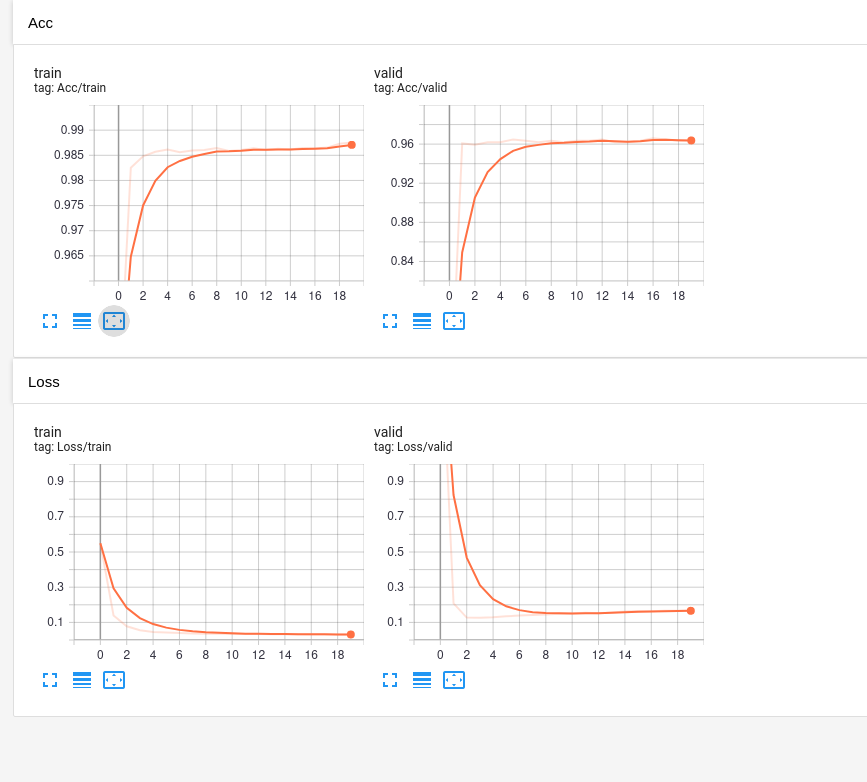

In [149]:
model.eval()
pred_y = model(train_X)
pred_y_label = activation(pred_y).argmax(axis=1)
print("train")
show_result(train_y, pred_y_label)

pred_y = model(valid_X)
pred_y_label = activation(pred_y).argmax(axis=1)
print("valid")
show_result(valid_y, pred_y_label)

pred_y = model(test_X)
pred_y_label = activation(pred_y).argmax(axis=1)
print("test")
show_result(test_y, pred_y_label)


train
accuracy	: 1.0
f1_score	: 1.0
recall_score	: 1.0
precision_score	: 1.0

valid
accuracy	: 0.9633649932157394
f1_score	: 0.9602277972373384
recall_score	: 0.9593833675726402
precision_score	: 0.9615807500067459

test
accuracy	: 0.9701492537313433
f1_score	: 0.9667242440482728
recall_score	: 0.9653098350664199
precision_score	: 0.9685535107358475



それなりに高いスコアがでた

   # 方針2: embeddeingにおける事前学習(ダメだった)

embeddeingを使って重みを事前学習する方針を考えた

結果を残していないがacc0.7程度だったので辞めたが，記録として残しておく

うまく行かなかった理由は，分類が語彙だけではなく記号の使い方などの表現も関係しているからか，単にチューニングができていないかのいずれかだと考えられる

In [1]:
#用いたライブラリ．　一部使用していないものもある

from collections import defaultdict
import numpy as np
import re

import neologdn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import TensorDataset, DataLoader
import datetime
import torch.optim as optim
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix

import torch
import torch.nn as nn

In [190]:
import torch.nn.functional as F
from sklearn.feature_extraction import DictVectorizer

In [33]:
from torchtext import data
from torchtext import datasets
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd

「日本語 Wikipedia エンティティベクトル」を用いて埋め込み層を事前学習

http://www.cl.ecei.tohoku.ac.jp/~m-suzuki/jawiki_vector/

In [39]:
# 前回の流用
urlre=re.compile(r'(http|https)://([-\w]+\.)+[-\w]+(/[-\w./?%&=]*)?')
symbolre = re.compile('[，．、。]')
# numre = re.compile(r'\d+')

def normalize_text(s):
    token = []
    s=s.replace('\u3000','')
    neologdn.normalize(s)
    s=urlre.sub("", s)
    s=symbolre.sub(" ", s)
#     s=numre.sub('0', s)
    node = tagger.parseToNode(s)
    while node:
        features = node.feature.split(',')
        pos = features[0]
        pos_sub1 = features[1]
        base = features[6]
        if node.surface == '':
            node = node.next
            continue
        if pos in ['名詞', '動詞', '形容詞', '連体詞', '副詞', '感動詞'] and pos_sub1 not in  ['非自立', '接尾']:
            if base == "*":
                token.append(node.surface)
            else:
                token.append(base)

        node = node.next

    return " ".join(token)

In [49]:
import MeCab
tagger = MeCab.Tagger('-Owakati')
def add_tokenization(D):
    for d in D:
        d['text.mytokenized'] = [mytokenize2(s) for s in d['text']]

add_tokenization(Dtrain)
add_tokenization(Ddev)
add_tokenization(Dtest)

In [ ]:
def tokenizer(text):
    text = normalize_text(text)
    return text.split()

In [43]:
#事前学習用の日本語word2vecモデル
from gensim.models import KeyedVectors
w2vModel = KeyedVectors.load_word2vec_format('entity_vector/entity_vector.model.bin', binary=True)

In [103]:
train_text = [" ".join([d['title']]) for d in Dtrain]
dev_text = [" ".join([d['title']]) for d in Ddev]
test_text = [" ".join([d['title']]) for d in Dtest]

train_text = [t.replace('\t', ' ')for t in train_text]
dev_text = [t.replace('\t', ' ')for t in dev_text]
test_text = [t.replace('\t', ' ')for t in test_text]

In [104]:
VY = preprocessing.LabelEncoder()
Ytrain = VY.fit_transform([d['source'] for d in Dtrain])
Ydev = VY.transform([d['source'] for d in Ddev])
Ytest = VY.transform([d['source'] for d in Dtest])

train_y=torch.tensor(Ytrain,dtype=torch.int64)
valid_y=torch.tensor(Ydev,dtype=torch.int64)
test_y=torch.tensor(Ytest,dtype=torch.int64)

In [160]:
pd.DataFrame([train_text, Ytrain]).T.to_csv('train.csv',sep = '\t', header=None, index=None)
pd.DataFrame([dev_text, Ydev]).T.to_csv('dev.csv',sep = '\t', header=None, index=None)
pd.DataFrame([test_text, Ytest]).T.to_csv('test.csv',sep = '\t', header=None, index=None)

In [209]:

TEXT = data.Field(sequential=True, tokenize=tokenizer, batch_first=True)
LABEL = data.Field(sequential=False, batch_first=True, use_vocab=False)
train, dev, test = data.TabularDataset.splits(
        path='.', train='train.csv',
        validation='dev.csv', test='test.csv', format='tsv',
        fields=[('Text', TEXT),('Label', LABEL)])

TEXT.build_vocab(train, min_freq=2)
LABEL.build_vocab(train)

/home/yumizsui/anaconda3/lib/python3.8/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/home/yumizsui/anaconda3/lib/python3.8/site-packages/torchtext/data/example.py:68: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)
/home/yumizsui/anaconda3/lib/python3.8/site-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent rel

In [210]:
BATCH_SIZE=128
train_iter, dev_iter, test_iter = data.BucketIterator.splits(
    (train, dev, test), batch_sizes=(BATCH_SIZE, BATCH_SIZE, 64), repeat=False, sort=False)

In [211]:
VOCAB_SIZE=len(TEXT.vocab.itos)
# WikiEntVecで固定
EMB_SIZE=200
weights = np.zeros((VOCAB_SIZE, EMB_SIZE))
for word in TEXT.vocab.itos:
    idx = TEXT.vocab.stoi[word]
    if word in w2vModel.vocab:
        weights[idx] = w2vModel[word]
weights=torch.FloatTensor(weights)

In [212]:
HIDDEN_SIZE = 64
OUTPUT_SIZE=len(train_y.unique())
dropout=0.5
class CNNs(nn.Module):
    def __init__(self):
        super().__init__()
        self.emb = nn.Embedding.from_pretrained(weights)
        self.conv = nn.Conv1d(EMB_SIZE, HIDDEN_SIZE, 3,stride=1, padding=1)
        self.linear = nn.Linear(HIDDEN_SIZE,OUTPUT_SIZE)
        self.dropout = nn.Dropout(dropout)
        
        # initialize
        nn.init.kaiming_normal_(self.conv.weight)
        nn.init.constant_(self.conv.bias, 0)
        nn.init.kaiming_normal_(self.linear.weight)
        nn.init.constant_(self.linear.bias, 0)
        
    def forward(self,x):
        h=self.emb(x)
        h=self.conv(h.transpose(1,2))
        h=F.relu(h)
        h = self.dropout(h)
        h=F.max_pool1d(h,h.size(2)).squeeze(2)
        y=self.linear(h)
        return y

In [216]:
def is_equal_pred(pred_y,true_y):
    return Softmax(pred_y).argmax(axis=1) == true_y

def train_step(train_X, train_y,model):
    model.train()
    pred_y = model(train_X)
    
    optimizer.zero_grad()
    loss = criterion(pred_y, train_y)
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        n=len(train_y)
        acc = is_equal_pred(pred_y,train_y).sum()
    
    return (loss.item(), acc.item()/n)

def dev_step(dev_X, dev_y,model):
    with torch.no_grad():
        model.eval()
        pred_y = model(dev_X)

        loss = criterion(pred_y, dev_y)
    
        n=len(dev_y)
        acc = is_equal_pred(pred_y,dev_y).sum()

    return (loss.item(), acc.item()/n)

In [213]:

device = torch.device("cpu")

model=CNNs()
model=model.to(device)

REGULARIZATION = 0.0001
optimizer = optim.Adadelta(
    model.parameters(),weight_decay=REGULARIZATION)
criterion=nn.CrossEntropyLoss()

In [99]:
from tqdm import tqdm

In [217]:
for epoch in tqdm(range(EPOCHS)):
    train_loss_mean=[]
    train_acc_mean=[]
    for d in train_iter:
        train_loss, train_acc = train_step(d.Text, d.Label,model)
        train_loss_mean.append(train_loss)
        train_acc_mean.append(train_acc)
    
    with torch.no_grad():
        dev_loss_mean=[]
        dev_acc_mean=[]
        for d in dev_iter:
            dev_loss, dev_acc=dev_step(d.Text, d.Label,model)
            dev_loss_mean.append(dev_loss)
            dev_acc_mean.append(dev_acc)

        train_loss_mean=np.mean(train_loss_mean)
        train_acc_mean=np.mean(train_acc_mean)
        dev_loss_mean=np.mean(dev_loss_mean)
        dev_acc_mean=np.mean(dev_acc_mean)
    
        writer.add_scalar("Loss/train", train_loss_mean, epoch)
        writer.add_scalar("Acc/train", train_acc_mean, epoch)
        writer.add_scalar("Loss/dev", dev_loss_mean, epoch)
        writer.add_scalar("Acc/dev", dev_acc_mean, epoch)

writer.close()


100%|██████████| 100/100 [00:45<00:00,  2.20it/s]


# 方針3 パラメータチューニング

方針1である程度の値が出たので，この方向でパラメータチューニングをしてみる．
以下では最も性能が出た方法のみ解説する．

まず，今回はデータ数が十分にあるので，ニューラルネットに任せて学習させる方向で考え，方針1で用いていたtokenizerを辞め，簡素なものに変更した

optunaによってパラメータチューニングを行い，以下のパラメータを探索することにした

1. 中間層の次元1
2. 中間層の次元2
3. dropoutの割合
4. 学習率
5. weight decay

なお，パラメータチューニングは膨大な計算リソースが必要であることを考え，Google Colaboratory ProでTesla V100用いた
（レポートをまとめたのは手元のPCである）

In [ ]:
def tokenize(s):
    s=' '.join(s)
    return tagger.parse(s).split()

In [20]:
def is_equal_pred(pred_y, true_y):
    return Softmax(pred_y).argmax(axis=1) == true_y

In [78]:
def show_result(true_y, pred_y):
    print(f'accuracy\t: {(pred_y==true_y).sum().item()/len(pred_y)}')
    print(f'f1_score\t: {f1_score(true_y, pred_y_label,  average="macro")}')
    print(f'recall_score\t: {recall_score(true_y, pred_y_label,  average="macro")}')
    print(f'precision_score\t: {precision_score(true_y, pred_y_label,  average="macro")}')
    print("")

In [21]:
# vector化 TFIDF:単語の重要度によるベクトル化． 単語の出現頻度と逆文書頻度（単語の希少さ）の積
# min_df=3 : 出現数3未満の語彙は除外
# max_df=0.7 : 70%の文書で出現する語彙は除外
vectorizer = TfidfVectorizer(analyzer=mytokenize,min_df=3, max_df=0.7, norm='l2', sublinear_tf=True)
vectorizer.fit([[d['title']]+d['text'] for d in Dtrain])

# 用いるデータ
# titleとtextを結合してベクトル化
Xtrain_tfidf = vectorizer.transform([[d['title']]+ d['text'] for d in Dtrain])
Xdev_tfidf =vectorizer.transform([[d['title']]+ d['text'] for d in Ddev])
Xtest_tfidf = vectorizer.transform([[d['title']]+ d['text'] for d in Dtest])

# 分類
VY = preprocessing.LabelEncoder()
Ytrain = VY.fit_transform([data['source'] for data in Dtrain])
Ydev = VY.transform([data['source'] for data in Ddev])
Ytest = VY.transform([data['source'] for data in Dtest])

In [22]:
dtype = torch.float
train_X=torch.tensor(Xtrain_tfidf.toarray(),dtype=dtype)
train_y=torch.tensor(Ytrain,dtype=torch.int64)
valid_X=torch.tensor(Xdev_tfidf.toarray(),dtype=dtype)
valid_y=torch.tensor(Ydev,dtype=torch.int64)
test_X=torch.tensor(Xtest_tfidf.toarray(),dtype=dtype)
test_y=torch.tensor(Ytest,dtype=torch.int64)


In [38]:
def learningNNs(model, optimizer):
    max_f1=-1
    best_model=model
    for epoch in range(EPOCHS):
        for x,y in loader_train:
            train_step(train_X.to(device),train_y.to(device),model, optimizer)

        with torch.no_grad():
            valid_f1s=[]
            for x,y in loader_valid:
                valid_f1=valid_step(valid_X.to(device), valid_y.to(device),model, optimizer)
                valid_f1s.append(valid_f1)

            valid_f1_mean=np.mean(valid_f1s)
            print(f'{epoch}', end=' ')
            
            if max_f1 < valid_f1_mean:
                max_f1=valid_f1_mean
                best_model=model
    print(f'best is {max_f1}')
    return max_f1

In [23]:
import optuna

In [39]:
import optuna

EPOCHS=20
INPUT_SIZE=train_X.shape[1]
OUTPUT_SIZE=len(train_y.unique())

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Softmax=nn.Softmax(dim=1)
criterion=nn.CrossEntropyLoss()

ds_train = TensorDataset(train_X.to(device), train_y.to(device))
ds_valid = TensorDataset(valid_X.to(device), valid_y.to(device))

batchsize=128
loader_train = DataLoader(ds_train, batch_size=batchsize, shuffle=False)
loader_valid = DataLoader(ds_valid, batch_size=batchsize, shuffle=False)

ops={'Adadelta': torch.optim.Adadelta, 'Adam': torch.optim.Adam}
def objective(trial):
    MIDDLE1_SIZE = int(trial.suggest_loguniform('MIDDLE1_SIZE', 16, 1024))
    MIDDLE2_SIZE = int(trial.suggest_loguniform('MIDDLE2_SIZE', 16, 1024))
    DROP_RATE = trial.suggest_uniform('DROP_RATE', 0.0, 1.0)
    LEARNING_RATE = trial.suggest_loguniform('LEARNING_RATE', 1e-4, 1e-2)
    WEIGHT_DECAY = trial.suggest_uniform('WEIGHT_DECAY', 0.0, 1.0)
    OPTIMIZER = trial.suggest_categorical('OPTIMIZER', ['Adadelta', 'Adam'])

    model = torch.nn.Sequential(
        nn.Linear(INPUT_SIZE, MIDDLE1_SIZE),
        nn.BatchNorm1d(MIDDLE1_SIZE),
            torch.nn.ReLU(),
        torch.nn.Dropout(DROP_RATE),
        nn.Linear(MIDDLE1_SIZE, MIDDLE2_SIZE),
        nn.BatchNorm1d(MIDDLE2_SIZE),
        torch.nn.ReLU(),
        torch.nn.Dropout(DROP_RATE),
        torch.nn.Linear(MIDDLE2_SIZE, OUTPUT_SIZE),
    )
    model = model.to(device)


    optimizer = ops[OPTIMIZER](model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)


    max_f1 = learningNNs(model, optimizer)

    return max_f1 

In [54]:
def train_step(train_X, train_y,model, optimizer):
    model.train()
    pred_y = model(train_X)
    
    optimizer.zero_grad()
    loss = criterion(pred_y, train_y)
    loss.backward()
    optimizer.step()
    
    n=len(train_y)
    
    acc = is_equal_pred(pred_y, train_y).sum()
    
    return (loss.item(), acc.item()/n)

def valid_step(valid_X, valid_y,model, optimizer):
    model.eval()
    pred_y = model(valid_X)
    
    loss = criterion(pred_y, valid_y)
    
    n=len(valid_y)
    acc = is_equal_pred(pred_y, valid_y).sum()

    return (loss.item(), acc.item()/n)

In [ ]:
TRIAL_SIZE = 10
study = optuna.create_study()
study.optimize(objective, n_trials=TRIAL_SIZE)

In [72]:

nowstr=datetime.datetime.now().strftime('%Y%m%d_%H%M')
writer = SummaryWriter(log_dir=f"./logs_{nowstr}")

## 試行回数を増やして最良のモデルを選択

optunaで探索した結果はoptuna_paramsの通りである．

In [1]:
optuna_params= {'MIDDLE1_SIZE': 358.69541493607227, 'MIDDLE2_SIZE': 90.47641111152377, 'DROP_RATE': 0.24154744447309268, 'LEARNING_RATE': 0.00010036553741117424, 'WEIGHT_DECAY': 0.0038296188353909577}

In [2]:
MIDDLE1_SIZE=int(optuna_params['MIDDLE1_SIZE'])
MIDDLE2_SIZE=int(optuna_params['MIDDLE2_SIZE'])
DROP_RATE=optuna_params['DROP_RATE']
LEARNING_RATE=optuna_params['LEARNING_RATE']
WEIGHT_DECAY=optuna_params['WEIGHT_DECAY']

In [5]:
print(f'MIDDLE1_SIZE:{MIDDLE1_SIZE}')
print(f'MIDDLE2_SIZE:{MIDDLE2_SIZE}')
print(f'DROP_RATE:{DROP_RATE}')
print(f'LEARNING_RATE:{LEARNING_RATE}')
print(f'WEIGHT_DECAY:{WEIGHT_DECAY}')

MIDDLE1_SIZE:358
MIDDLE2_SIZE:90
DROP_RATE:0.24154744447309268
LEARNING_RATE:0.00010036553741117424
WEIGHT_DECAY:0.0038296188353909577


In [75]:
model = torch.nn.Sequential(
    nn.Linear(INPUT_SIZE, MIDDLE1_SIZE),
    nn.BatchNorm1d(MIDDLE1_SIZE),
        torch.nn.ReLU(),
    torch.nn.Dropout(DROP_RATE),
    nn.Linear(MIDDLE1_SIZE, MIDDLE2_SIZE),
    nn.BatchNorm1d(MIDDLE2_SIZE),
    torch.nn.ReLU(),
    torch.nn.Dropout(DROP_RATE),
    torch.nn.Linear(MIDDLE2_SIZE, OUTPUT_SIZE),
)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

In [63]:
EPOCHS=100

In [ ]:
for epoch in range(EPOCHS):
    train_loss_mean=[]
    train_acc_mean=[]
    for x,y in loader_train:
        train_loss, train_acc=train_step(train_X,train_y,model, optimizer)
        train_loss_mean.append(train_loss)
        train_acc_mean.append(train_acc)

    with torch.no_grad():
        valid_loss_mean=[]
        valid_acc_mean=[]
        for x,y in loader_valid:
            valid_loss, valid_acc=valid_step(valid_X, valid_y,model, optimizer)
            valid_loss_mean.append(valid_loss)
            valid_acc_mean.append(valid_acc)

        train_loss_mean=np.mean(train_loss_mean)
        train_acc_mean=np.mean(train_acc_mean)
        valid_loss_mean=np.mean(valid_loss_mean)
        valid_acc_mean=np.mean(valid_acc_mean)

        writer.add_scalar("Loss/train", train_loss_mean, epoch)
        writer.add_scalar("Acc/train", train_acc_mean, epoch)
        writer.add_scalar("Loss/valid", valid_loss_mean, epoch)
        writer.add_scalar("Acc/valid", valid_acc_mean, epoch)

        torch.save(model.state_dict(), f"output/date{nowstr}_epoch{epoch}.model")
        torch.save(optimizer.state_dict(), f"output/date{nowstr}_epoch{epoch}.param")


In [ ]:
model.eval()
pred_y = model(train_X)
pred_y_label = Softmax(pred_y).argmax(axis=1)
print("train")
show_result(train_y, pred_y_label)

pred_y = model(valid_X)
pred_y_label = Softmax(pred_y).argmax(axis=1)
print("valid")
show_result(valid_y, pred_y_label)

pred_y = model(test_X)
pred_y_label = Softmax(pred_y).argmax(axis=1)
print("test")
show_result(test_y, pred_y_label)

Google Colaboratoryの結果をスクショしたものです

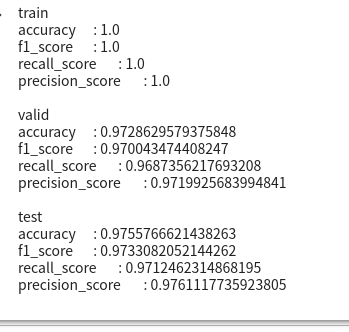

In [ ]:
さらに手動でパラメータを調節したところ，少しだけ検証スコアが高くなる場合も確認できた

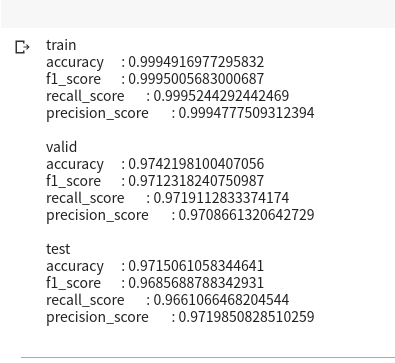